<a href="https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/RedesNeurais/MLPRegressao/Regressor_Valid_Cruzada_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSOR MLP, VALIDAÇÃO CRUZADA E AVALIAÇÕES
Objetivo: Explorar um algoritmo de aprendizado de máquina, Redes Neurais Multilayer Perceptron, para compreender o método de validação cruzada e as métricas utilizadas para avaliar um modelo de regressor.

Glossário utilizado no nosso curso

treino: dataset de treinamento
validação: parte do dateset de treinamento utilizado para validar
teste cego: dados que não foram utilizados na etapa de treinamento/validação
Frequentemente, as bibliotecas utilizam treino/teste em vez de treino/validação.

In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor


**(1) Geração de um dataset artificial**

Gerar pontos que seguem uma senoidal com ruído. Neste exemplo, nós conhecemos a função verdadeira e vamos acrescentar ruido. Em seguida vamos ver o quanto o regressor se aproxima da função verdadeira.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar uma senoide
np.random.seed(42)  # para reproduzir sempre o mesmo resultado
N_SAMPLES = 1200    # número de amostras
NOISE = 0.1        # ruido

# X vem de uma distribuição uniforme
X = np.random.uniform(0, 1, N_SAMPLES)

# Função verdadeira = sin(2.pi.x)
def true_fun(X):
    return np.sin(2 * np.pi * X)

# Ruido: normal(mean, std_dev, samples)
noise = np.random.normal(0, NOISE, N_SAMPLES).reshape(-1, 1)

# Valores de y sem ruido
y = true_fun(X)

y_noisy = y + noise.flatten()


**(2) Plotar a função verdadeira**

Vamos ver a função verdadeira e os pontos com ruído. É a partir destes pontos (com ruído) que o algoritmo CART vai fazer uma aproximação da curva verdadeira.

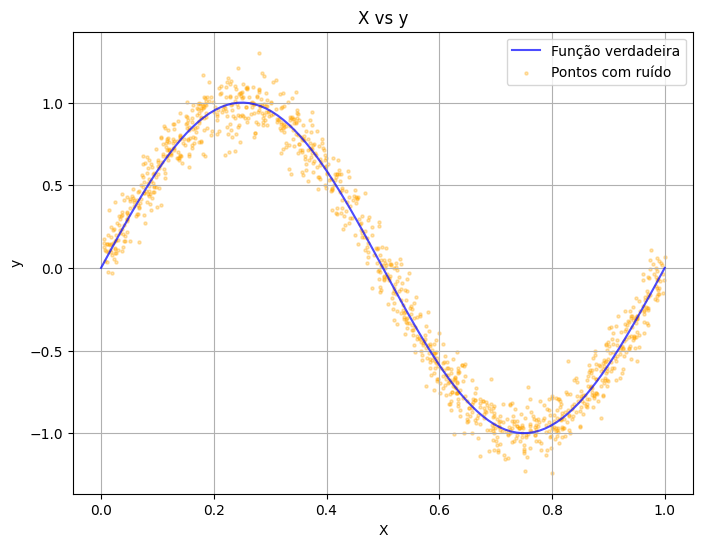

In [26]:
plt.figure(figsize=(8, 6))
X_plot = np.linspace(0, 1, 100)
plt.plot(X_plot, true_fun(X_plot), label='Função verdadeira', color='blue', alpha=0.7)

# s define o tamanho do ponto
plt.scatter(X, y_noisy, s=5, label='Pontos com ruído', color='orange', alpha=0.3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y')
plt.legend()
plt.grid(True)
plt.show()

**(3) Validação cruzada**

É um método para treinar/validar e testar modelos de aprendizado para evitar a sobreadaptação (*overfitting*) às amostras de treinamento.

Primeiramente, vamos dividir o dataset em duas partes (hold-out):
1.   para **treinamento e validação** (vou chamar train; para aprendizado do modelo)
2.   para **testes cegos - com dados não utilizados** em 1 (vou chamar de test)


**Parêmetros importantes**:
* *test_size*: qual fração do dataset será reservado para testes (entre 20-30%)
* *shuffle*: boolean; embaralha ou não antes de dividir (recomendável true)

Você pode fazer o fracionamento do dataset manualmente com a função *train_test_split*.

Documentação: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [27]:
from sklearn.model_selection import train_test_split
## Dividir o dataset em treinamento/validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, shuffle=True)

#\t{value}>4 tabulação a direita (reserva 4 algarismos)
print(f"Tam. total do dataset.......:\t{len(X):>4}")
print(f"Tam. dataset treino & valid.:\t{len(X_train):>4}")
print(f"Tam. dataset testes cegos...:\t{len(X_test):>4}")

Tam. total do dataset.......:	1200
Tam. dataset treino & valid.:	 840
Tam. dataset testes cegos...:	 360


**(4) Parametrizações de treinamento**

Vamos variar os seguintes parâmetros:
- camadas ocultas = n_layers
- número de neurônios por camada = n_neurons
- taxas de aprendizado = learning rates

E deixar alguns fixos:
- algoritmo de aprendizado: `sgd` refers to stochastic gradient descent.
- critério de parada = `max_iter` = número máximo de iterações (épocas)
- função de ativação = `logistic`

[Documentação de RN MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [28]:
# parametros variaveis
num_params = 3               # num de parametrizacoes a treinar
n_layers = [2, 6, 20]
n_neurons = [4, 10, 20]
learning_rates = [0.01, 0.025, 0.03]

# parametros fixos
solver = 'sgd'
max_iter = 10000
activation = 'tanh'
momentum = 0.95

results = []

# validação cruzada
k_folds = 5

```
Para cada parametrização:
- para cada um dos k folds:
  - cross_val_score treina um modelo
  - cross_val_score calcula o erro para os dados de treinamento e validação separadamente
- temos k modelos diferentes
```

A ideia é mostrar as diferenças entre as parametrizações:

1) **underfitted**:

2) **equilibrada**:

3) **overfitted**:

---



In [29]:
## Metricas para regressao
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

# Vars para salvar os modelos e resultados
best_model=[]   # armazenar o melhor modelo de cada parametrização
model=[]        # todos os modelos de cada parametrização
train_scores=[]
vld_scores=[]
best_index=[]
mse=[]

# Instanciação do regressor i
for i in range(num_params):
  # Correctly create a tuple for hidden_layer_sizes
  neurons_per_layer = tuple([n_neurons[i]] * n_layers[i])

  print(f"training MLP with hidden layers: {neurons_per_layer}")
  rn = MLPRegressor(
      hidden_layer_sizes=neurons_per_layer,
      activation=activation,
      solver=solver,
      learning_rate='adaptive',
      learning_rate_init=learning_rates[i],
      max_iter=max_iter,
      shuffle=True,
      momentum=momentum,
      random_state=42
      )

  # cross_validate faz fit (treinamento) e retorna um modelo aprendido por fold,
  # o score de treino e o de validação (ver mais abaixo)
  cv_results = cross_validate(
      rn,
      X_train.reshape(-1, 1),
      y_train,
      cv=k_folds,
      scoring='neg_mean_squared_error', # scikit usa negativo para manter o padrao de quanto mais alto o score, melhor o estimador
                                        # Neste caso, quanto maior o MSE (negativo), melhor será porque mede o erro.
      return_train_score=True,  # Include training scores
      return_estimator=True     # Include trained models
  )

  # MSE de treino e validação (erro quadrático médio, mean squared error)
  train_scores.append(cv_results['train_score'])
  vld_scores.append(cv_results['test_score'])
  print(f"NEG MSE treino   : {train_scores[i]}")
  print(f"NEG MSE validação: {vld_scores[i]}\n")

  # Diferença absoluta do MSE do treinamento e de validação
  bias = np.abs(train_scores[i] - vld_scores[i])

  # Salva o indice do menor score)
  best_index.append(np.argmax(vld_scores[i]))

  # Salva o modelo que apresenta melhor score (MSE)
  best_model.append(cv_results['estimator'][best_index[i]])

  # Salva todos os modelos da parametrizacao
  model.append(cv_results['estimator'])

  #print(f"Parametrization {i+1}: {model}")
  print(f"Best Index: {best_index[i]}\n")

training MLP with hidden layers: (4, 4)
NEG MSE treino   : [-0.04501676 -0.04550192 -0.0456335  -0.04490461 -0.04517579]
NEG MSE validação: [-0.05055203 -0.0424989  -0.04647042 -0.04145191 -0.04773774]

Best Index: 3

training MLP with hidden layers: (10, 10, 10, 10, 10, 10)
NEG MSE treino   : [-0.01055902 -0.01033262 -0.01041185 -0.01083491 -0.01039658]
NEG MSE validação: [-0.0105973  -0.01102475 -0.01137519 -0.00964592 -0.01104219]

Best Index: 3

training MLP with hidden layers: (20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20)
NEG MSE treino   : [-0.01058098 -0.01035684 -0.01025452 -0.04356809 -0.01028962]
NEG MSE validação: [-0.01073461 -0.01111329 -0.01128797 -0.03622689 -0.01098934]

Best Index: 0




----

**(5) Visualização dos resultados de treinamento e validação**

Vamos comparar o resultado das parametrizações para cada modelo aprendido (1 por fold).

Observe as diferenças dos MSEs de treino e de validação.
A parametrização 1 é pior do que a 2.

Viés aqui é calculado de modo aproximado para cada fold:

`abs(NEG_MSE_train - NEG_MSE_vld)`

e para a média dos MSEs (coluna Mean).


Observe que usamos o **NEG MSE** (MSE negativo). Scikit-learn faz isso para manter a coerência na avaliação de estimadores por um score qualquer: quanto maior o score, melhor o modelo. Como o MSE representa o erro de aprendizado, quanto maior, pior é! Por isso ele inverte os sinal.


In [30]:
  # Resultados
  print("Train & Valid Scores (Neg MSE) per parametrization:")
  for i in range(num_params):
    print(f"Par{i+1}\tMean\t\tVar.\t\tScores per fold")
    # ddof=1 variancia amostral
    print(f"Trn:\t{train_scores[i].mean():>8.6f}\t{train_scores[i].var(ddof=1):>8.6f}\t{train_scores[i]}")
    print(f"Vld:\t{vld_scores[i].mean():>8.6f}\t{vld_scores[i].var(ddof=1):>8.6f}\t{vld_scores[i]}")
    print(f"Dif:\t{np.abs(train_scores[i].mean() - vld_scores[i].mean()):>8.6f}\t\t\t{abs(train_scores[i] - vld_scores[i])}")
    print(f"Best index: {best_index[i]}")
    print()

Train & Valid Scores (Neg MSE) per parametrization:
Par1	Mean		Var.		Scores per fold
Trn:	-0.045247	0.000000	[-0.04501676 -0.04550192 -0.0456335  -0.04490461 -0.04517579]
Vld:	-0.045742	0.000014	[-0.05055203 -0.0424989  -0.04647042 -0.04145191 -0.04773774]
Dif:	0.000496			[0.00553528 0.00300302 0.00083692 0.0034527  0.00256195]
Best index: 3

Par2	Mean		Var.		Scores per fold
Trn:	-0.010507	0.000000	[-0.01055902 -0.01033262 -0.01041185 -0.01083491 -0.01039658]
Vld:	-0.010737	0.000000	[-0.0105973  -0.01102475 -0.01137519 -0.00964592 -0.01104219]
Dif:	0.000230			[3.82766309e-05 6.92127513e-04 9.63343324e-04 1.18898991e-03
 6.45601209e-04]
Best index: 3

Par3	Mean		Var.		Scores per fold
Trn:	-0.017010	0.000220	[-0.01058098 -0.01035684 -0.01025452 -0.04356809 -0.01028962]
Vld:	-0.016070	0.000127	[-0.01073461 -0.01111329 -0.01128797 -0.03622689 -0.01098934]
Dif:	0.000940			[0.00015364 0.00075644 0.00103344 0.0073412  0.00069972]
Best index: 0



Vamos comparar graficamente os resultados das parametrizações. Recordar que estamos utilizando o MSE negativo como score, então quanto maior melhor. No print acima, observe os melhores índices.


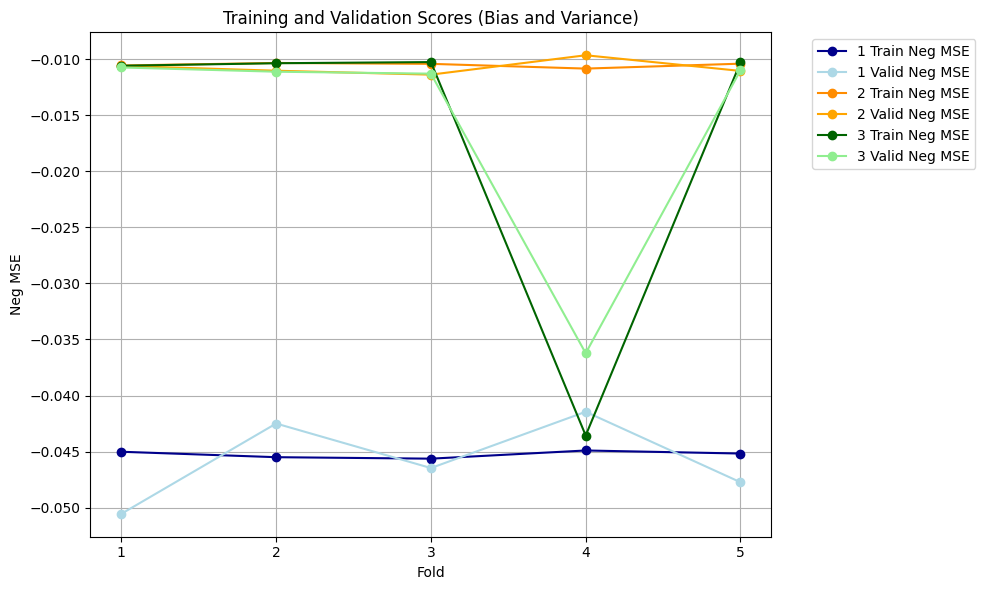

In [31]:
plt.figure(figsize=(10, 6))
colors = [
    ["darkblue", "lightblue"],  # Tons de azul para i=0
    ["darkorange", "orange"],  # Tons de laranja para i=1
    ["darkgreen", "lightgreen"],  # Tons de verde para i=2 (se houver mais índices)
]

for i in range(num_params):
    plt.plot(range(1, len(train_scores[i]) + 1), train_scores[i], label=f"{i+1} Train Neg MSE", marker='o', color=colors[i][0])
    #plt.axhline(train_scores[i].mean(), color=colors[i][0], linestyle='--', label=f"{i+1} Train.mean: {train_scores[i].mean():.2f}")
    plt.plot(range(1, len(vld_scores[i]) + 1), vld_scores[i], label=f"{i+1} Valid Neg MSE", marker='o', color=colors[i][1])
    #plt.axhline(vld_scores[i].mean(), color=colors[i][1], linestyle='--', label=f"{i+1} Valid.mean: {vld_scores[i].mean():.2f}")

# Add labels and legend
plt.xlabel("Fold")
plt.ylabel("Neg MSE")
plt.title("Training and Validation Scores (Bias and Variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posição da legenda fora do gráfico
plt.xticks(np.arange(1, k_folds + 1, 1))
plt.grid()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

---
## Visualizar os modelos aprendidos

Agora, vamos rodar o melhor modelo da parametrização 1 (curva azul) e o melhor da 2 (curva laranja). As diferentes curvas representam os modelos aprendidos para x0=[0, 1]. Observar como se aproximam da função verdadeira f(x).

Fica bem claro que a parametrização 1 é subajustada (precisão baixa) enquanto a 3 está sobreajustada (bastante sujeita a variações para dados de folds diferentes - ao menos em um deles variou bastante).

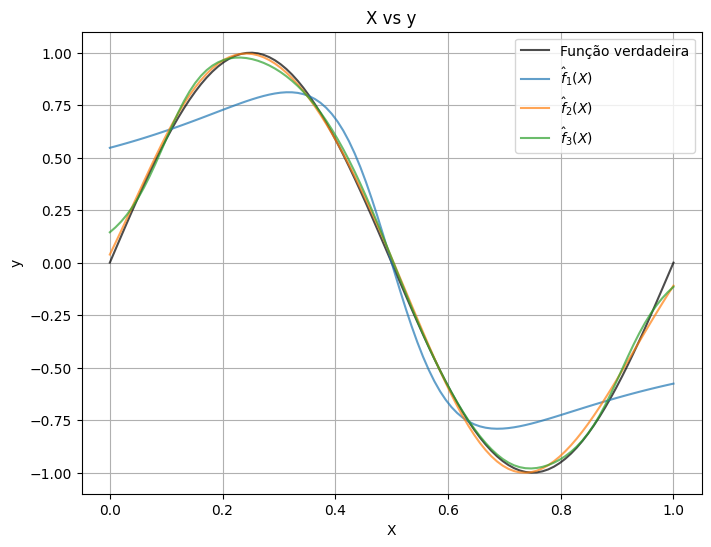

In [32]:
from matplotlib import cm
plt.figure(figsize=(8, 6))
plt.plot(X_plot, true_fun(X_plot), label='Função verdadeira', color='black', alpha=0.7)

for i in range(num_params):
  color = cm.viridis(i / (num_params - 1))
  plt.plot(X_plot, best_model[i].predict(X_plot.reshape(-1, 1)),
           label=r'$\hat{f}_{' + str(i+1) + '}(X)$', alpha=0.7)

plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y')
plt.legend()
plt.grid(True)
plt.show()

Compare os resultados obtidos com aqueles da árvore indutiva (CART) [texto do link](https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/CART/Regressor_Valid_Cruzada_CART.ipynb).

Experimente aumentar a taxa de ruído e veja se o desempenho piora.
Caso sim, aumente o dataset e avalia se melhorou o desempenho.